In [ ]:
!pip install tensorflow scikit-learn opencv-python numpy matplotlib tqdm

# Transfer Learning

In endeavor finding the best model that fit for (Multi Label Image Classification Dataset)[https://www.kaggle.com/datasets/meherunnesashraboni/multi-label-image-classification-dataset/data], building CNN model using DenseNet121 was made. The work employing Tensorflow's deep learning backend with Keras's API.

The process to make the model is as follow:

1. Dataset Pre-Processing
2. Dataset Loading
3. Model Architecture
4. Training the Model
5. Model Evaluation

## 1. Dataset Pre-Processing

The downloaded dataset structure as follow:

1. multilabel_classification.csv
2. multilabel_classification(2).csv
3. multilabel_classification(6)-reduced_modified.csv
4. multilabel_classification(7).csv
5. /images

During manual exploration, it is found there are 7844 images in total. So it is expected that the csv file, must also consist of only 7844 rows. With this requirement, the `multilabel_classification(6)-reduced_modified.csv` is chosen for its validity.

In dataset pre-processing endeavor, the more precise data integrity checks is conducted. This to ensure the registered label within csv file is 1:1 with the image within `/images` folder.

In [ ]:
import pandas;
import os;
import pathlib;
from tqdm import tqdm;
import numpy;

In [ ]:
from google.colab import drive;
drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
# Load csv file
# dataframe = pandas.read_csv("/Users/yosuakristianto/Documents/Dataset Repository/FIN DL/Number 1/multilabel_classification(6)-reduced_modified.csv");
# dataframe = pandas.read_csv("D:\\tDatase\\FIN DL\\Number 1\\multilabel_classification(6)-reduced_modified.csv");
dataframe = pandas.read_csv("/content/drive/MyDrive/Collab Dataset/FIN DL/Number 1/multilabel_classification(6)-reduced_modified.csv");

In [ ]:
# Integrity checking initialization
# image_folder_path = "/Users/yosuakristianto/Documents/Dataset Repository/FIN DL/Number 1/images/";
# image_folder_path = "D:\\tDatase\\FIN DL\\Number 1\\images\\";
image_folder_path = "/content/drive/MyDrive/Collab Dataset/FIN DL/Number 1/images/";

In [ ]:
# Starts integrity checking
print("Data integrity checking -", end = " ");

# Check for image data that not exist in the folder but exist in csv
not_found_image = [];

for idx, row in tqdm(dataframe.iterrows()):
    if(not os.path.exists(path = image_folder_path + row["Image_Name"])):
        not_found_image.append(idx);

# Check for duplicated image name data in csv
dataframe = dataframe.drop_duplicates(subset = ["Image_Name"]);

dataframe.shape, len(not_found_image)

Data integrity checking - 

7943it [01:13, 107.83it/s] 


((7843, 12), 0)

## 2. Data Loading

With no not found image came from csv file, further steps to do data pre-processing is unnecessary. The step continue to data loading. Data loading part consist of these process below:

1. Load image data from disk as NumPy array
Why? Because the deep learning model cannot directly read the image file. Instead, image convertion into HWC (Height-Width-Channel) array format, where every channels contains RGB color value.

Since the csv and image files are separated entity, sorting image files by its name is conducted for both csv and the image folder during data loading

2. Resize all images into 224 x 224 pixel

3. Define feature - label for every loaded image data to replace the image name.

4. Train-Test-Val splits

The splits ratio is 70:30:30

5. Data Loading Pattern
Making data loading pattern for better batch data segmentation and transformation. This is necessary since the minimum image height is 33 and image width was 120. This can be done by standardizing all images to 224 x 224.

In [ ]:
from sklearn.model_selection import train_test_split;
import cv2;

In [ ]:
# Load image data from disk as NumPy array

# Sort image file by name
list_files = os.listdir(image_folder_path);
list_files.sort()

images = [];

heights, widths = [], [];

for i in tqdm(list_files):
    image = cv2.imread(filename = image_folder_path + i);

    # Resize image to 224 x 224
    image = cv2.resize(image, (224, 224));

    images.append(image);

    height, width, channels = image.shape;

    heights.append(height);
    widths.append(width);

print(f"Minimal size: height: {min(heights)} - width: {min(widths)}");

100%|██████████| 7843/7843 [05:15<00:00, 24.87it/s] 

Minimal size: height: 224 - width: 224


In [ ]:
# Defining which is label and which is feature

# feature has been declared on the above cell as `images`
images = images;

# Convert dataframe's content by image name alp
sorted_dataframe = dataframe.sort_values(by=["Image_Name"], ascending=[True]);

# label
labels = sorted_dataframe.drop(columns = [" Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)", "Image_Name"]);

(len(images)), labels.shape

(7843, (7843, 10))

In [ ]:
# Train-Test-Split

# First to split it into 70:30
train_image, test_image, train_label, test_label = train_test_split(images, labels, train_size = 0.7, test_size = 0.3, random_state = 42);

# Since the test is already 30, then to make it 15:15 with val, we need to split it to 50:50
test_image, val_image, test_label, val_label = train_test_split(test_image, test_label, train_size = 0.5, test_size = 0.5, random_state = 42);

train_image = numpy.array(train_image);
test_image = numpy.array(test_image);
val_image = numpy.array(val_image);
train_label = train_label.to_numpy();
test_label = test_label.to_numpy();
val_label = val_label.to_numpy();

In [ ]:
print("Training dataset shape: ")

print("Total dataset, width, height")

print(len(train_image), len(train_image[0]), len(train_image[0][0]))
print(len(train_label), len(train_label[0]));

print(len(test_image), len(test_image[0]), len(test_image[0][0]))
print(len(test_label), len(test_label[0]));

print(len(val_image), len(val_image[0]), len(val_image[0][0]))
print(len(val_label), len(val_label[0]));

Training dataset shape: 
Total dataset, width, height
5490 224 224
5490 10
1176 224 224
1176 10
1177 224 224
1177 10


In [ ]:
# Helper Function
import requests;
import time;

# telegram_reporter
"""
This function helps to send message to telegram private channel
"""
def telegram_reporter(message):
    message = "[" + time.strftime("%Y-%m-%d %H:%M:%S") +"][CNN FROM SCRATCH] " + message
    requests.request(
        method="POST",
        url="https://api.telegram.org/bot6307342709:AAEehfQrvZzQhk2hFlOW7C1JnE2hRQYLEgE/sendMessage?chat_id=-1001525528850&text=" + message,
        headers={},
        data={}
    );

### PEgangan
https://a-a-r-s.org/proceeding/ACRS2022/ACRS22_156.pdf

In [ ]:
import tensorflow;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization;
from tensorflow.keras.optimizers import Adam, SGD, RMSprop;
from tensorflow.keras.utils import plot_model;
from tensorflow.keras.callbacks import EarlyStopping;
from tensorflow.keras.regularizers import l2, l1_l2;
from tensorflow.keras.applications import VGG19, DenseNet121;

import matplotlib.pyplot as plt;

In [ ]:
# Check whether the GPU is exist
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
class DenseNetModel:

  def __init__(self):
    self.model_name = "densenet121.202405310431";

    self.densenet = DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
    );

    self.global_pool = GlobalMaxPooling2D();
    self.bn1 = BatchNormalization();
    self.do1 = Dropout(0.5);

    self.dense1 = Dense(128, activation = "relu");
    self.bn2 = BatchNormalization();
    self.do2 = Dropout(0.5);

    self.dense2 = Dense(64, activation = "relu");
    self.bn3 = BatchNormalization();
    self.do3 = Dropout(0.3);

    self.output = Dense(10, activation = "sigmoid");

  # Early stopping after loss are not improved for some epochs
  def _callback_early_stopping(self):
      early_stopping_tolerance = 50;
      return EarlyStopping(
          monitor = "val_loss",
          patience = early_stopping_tolerance,
          restore_best_weights = True
      );

  def init_build(self):
    model = Sequential(name = self.model_name);

    model.add(self.densenet);

    model.add(self.global_pool);
    model.add(self.bn1);
    model.add(self.do1);

    model.add(self.dense1);
    model.add(self.bn2);
    model.add(self.do2);

    model.add(self.dense2);
    model.add(self.bn3);
    model.add(self.do3);

    model.add(self.output);

    return model;

  def fitting(self):
    model = self.init_build();
    model.compile(optimizer = RMSprop(learning_rate = 1e-3, clipnorm = 1.0, clipvalue = 0.5), loss = "binary_crossentropy", metrics = ["binary_accuracy"]);
    model.summary();

    plot_model(model, to_file = (f"model_architecture.{self.model_name}.png"), show_shapes = True);

    history = model.fit(
        train_image,
        train_label,
        epochs = 300,
        batch_size = 64,
        validation_data = (val_image, val_label),
        callbacks = [self._callback_early_stopping()]
    );

    # Plot training history
    plt.figure(figsize=(15, 12))

    # Loss
    plt.subplot2grid((3, 2), (0, 0));
    plt.plot(history.history['loss'], label='Training Loss');
    plt.plot(history.history['val_loss'], label='Validation Loss');
    plt.title('Loss Plots');
    plt.xlabel('Epoch');
    plt.ylabel('Loss');
    plt.legend();

    # Accuracy
    plt.subplot2grid((3, 2), (0, 1));
    plt.plot(history.history['binary_accuracy'], label='Training Binary Accuracy');
    plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy');
    plt.title('Binary Accuracy Plots');
    plt.xlabel('Epoch');
    plt.ylabel('Binary Accuracy');
    plt.legend();

    plt.tight_layout();
    plt.show();

    return model;

Model: "densenet121.202405310431"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d_6 (Gl  (None, 1024)              0         
 obalMaxPooling2D)                                               
                                                                 
 batch_normalization_9 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               131200    
                                                                 
 batch_normalization_10 (Ba  (None, 128)  

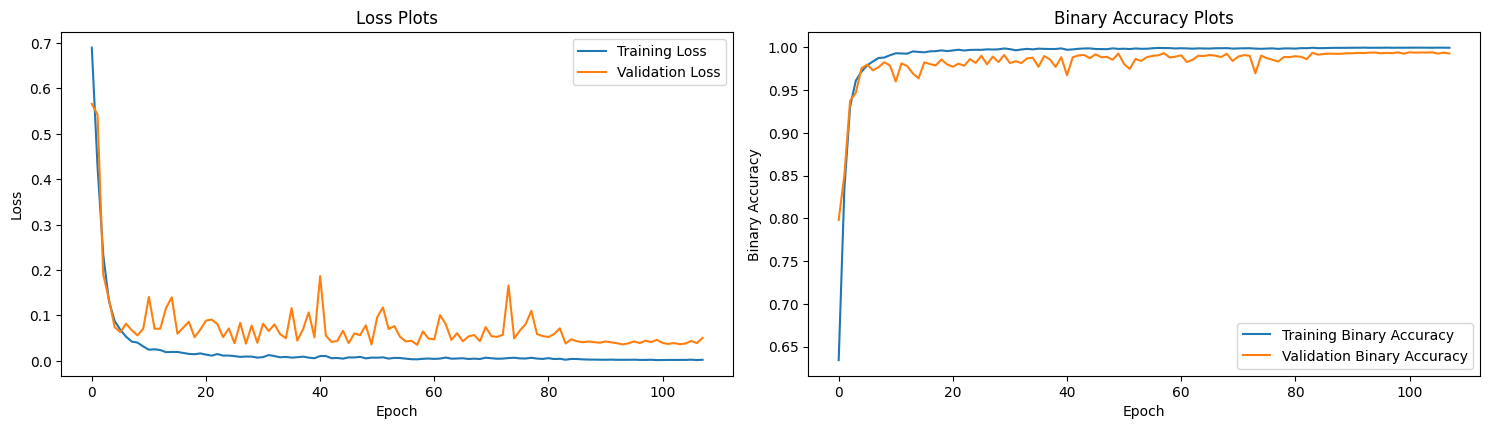

37/37 [==============================] - 1s 25ms/step - loss: 0.0424 - binary_accuracy: 0.9898
Test accuracy: 0.9897959232330322


In [ ]:
cnn = DenseNetModel();
telegram_reporter(f"Starting training {cnn.model_name}");

model = cnn.fitting();

test_loss, test_acc = model.evaluate(test_image, test_label)
print(f'Test accuracy: {test_acc}')

telegram_reporter("Training done");